In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

price, room type, neighbourhood

In [61]:
# Leer el archivo CSV comprimido directamente como DataFrame
gz_calendar= pd.read_csv('res/calendar.csv.gz', compression='gzip')

gz_listings=pd.read_csv('res/listings.csv.gz',compression='gzip')

gz_reviews=pd.read_csv('res/reviews.csv.gz',compression='gzip')

df_listings=pd.read_csv('res/listings.csv')

df_reviews=pd.read_csv('res/reviews.csv')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15772\2410161840.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  gz_calendar= pd.read_csv('res/calendar.csv.gz', compression='gzip')


In [62]:
print(gz_calendar.shape)
gz_calendar.head(5)


(3686136, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3078404,2024-06-29,f,"$1,500.00",NaN,7.0,20.0
1,3078404,2024-06-30,f,"$1,500.00",NaN,7.0,20.0
2,3078404,2024-07-01,f,"$1,500.00",NaN,7.0,20.0
3,3078404,2024-07-02,f,"$1,500.00",NaN,7.0,20.0
4,3078404,2024-07-03,f,"$1,500.00",NaN,7.0,20.0


In [63]:
gz_calendar.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3684311
minimum_nights          2
maximum_nights          2
dtype: int64

In [64]:
del gz_calendar['adjusted_price']

In [65]:
print(gz_listings.shape)
gz_listings.sample(5)

(10099, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5823,925993964352819334,https://www.airbnb.com/rooms/925993964352819334,20240629155744,2024-06-29,city scrape,3-roms med sjel,Spacious and through 3 bedroom apartment in qu...,Quiet and quiet area in green surroundings. Th...,https://a0.muscache.com/pictures/miso/Hosting-...,12861513,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
7283,1039075492900423964,https://www.airbnb.com/rooms/1039075492900423964,20240629155744,2024-06-30,previous scrape,Romslig og velutstyrt leilighet,Well-equipped and spacious apartment perfect f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,143112117,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
9772,1180371016408273545,https://www.airbnb.com/rooms/1180371016408273545,20240629155744,2024-06-29,city scrape,Living room in basement,Simple and peaceful accommodation with short d...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,12454552,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
6269,948341784145070482,https://www.airbnb.com/rooms/948341784145070482,20240629155744,2024-06-29,city scrape,High-standard room BI / Nydalen,WELCOME TO BEAUTIFUL NYDALEN near BI<br /><br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,146523614,...,5.0,4.9,4.9,NaN,f,1,0,1,0,1.9
9879,1182732927399179901,https://www.airbnb.com/rooms/1182732927399179901,20240629155744,2024-06-29,city scrape,2-BR Apt|15min to Center|Balcony,"Spacious apt with 2-BR in a quiet, family area...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,186398232,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [66]:
gz_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [67]:
columnas_a_eliminar = [t for t in gz_listings.columns if (gz_listings[t].isnull().sum() / gz_listings.shape[0] * 100) > 20]
gz_listings.drop(columns=columnas_a_eliminar, axis=1, inplace=True)

In [68]:
url=[i for i in gz_listings.columns if i[-3:]=='url']
gz_listings.drop(columns=url,axis=1,inplace=True)

In [69]:

eliminar=['host_name','description','host_has_profile_pic','amenities','host_identity_verified','host_location','property_type','bathrooms','bathrooms_text','beds','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','has_availability']

gz_listings.drop(columns=eliminar,axis=1,inplace=True)

In [70]:
gz_listings.shape

(10099, 33)

In [71]:
gz_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10099 non-null  int64  
 1   scrape_id                                     10099 non-null  int64  
 2   last_scraped                                  10099 non-null  object 
 3   source                                        10099 non-null  object 
 4   name                                          10099 non-null  object 
 5   host_id                                       10099 non-null  int64  
 6   host_since                                    10099 non-null  object 
 7   host_acceptance_rate                          8790 non-null   object 
 8   host_is_superhost                             9995 non-null   object 
 9   host_listings_count                           10099 non-null 

In [72]:
gz_listings.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)

In [73]:
gz_listings.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10099.0,NaN,NaN,NaN,727761819449215104.0,427984314100355328.0,42932.0,594041758423271168.0,900596761031286400.0,1071328676339277184.0,1189091774066713600.0
scrape_id,10099.0,NaN,NaN,NaN,20240629155744.0,0.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0
last_scraped,10099,2,2024-06-29,6992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,10099,2,city scrape,8890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,10099,9433,Leilighet på Grünerløkka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10099.0,NaN,NaN,NaN,175581736.859194,179729144.090502,43067.0,33739409.0,93032042.0,274316669.5,586067173.0
host_since,10099,3491,2019-01-02,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,8790,101,100%,2315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,9995,2,f,8269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,10099.0,NaN,NaN,NaN,2.864046,10.04627,1.0,1.0,1.0,2.0,131.0


In [74]:
nulos_por_columna = gz_listings.isnull().sum()

# Filtrar las columnas con más de un valor nulo
columnas_con_mas_de_un_nulo = nulos_por_columna[nulos_por_columna > 1]

print("Columnas con más de un valor nulo:")
print((columnas_con_mas_de_un_nulo.sort_values(ascending=False)/gz_listings.shape[0]*100).round(2))

Columnas con más de un valor nulo:
host_acceptance_rate    12.96
price                   12.37
bedrooms                 1.71
host_is_superhost        1.03
dtype: float64


<Axes: >

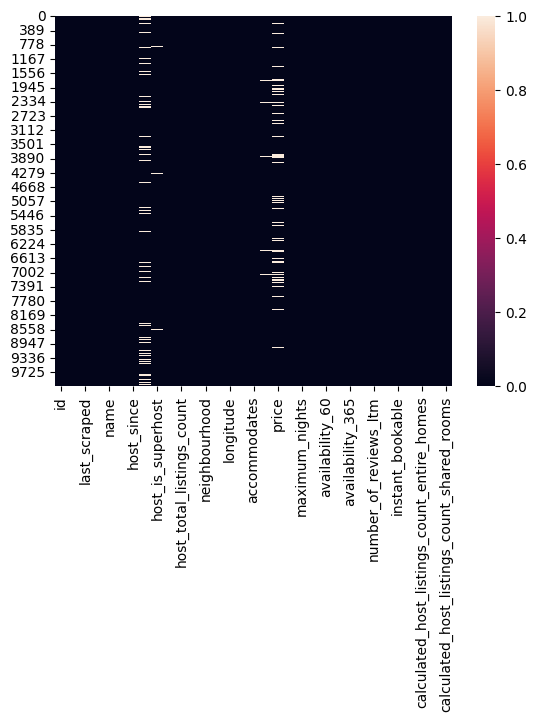

In [75]:
sns.heatmap(gz_listings.isnull())

In [76]:
columnas_con_mas_de_un_nulo

host_acceptance_rate    1309
host_is_superhost        104
bedrooms                 173
price                   1249
dtype: int64

In [77]:
gz_listings['price'] = gz_listings['price'].str.replace('[\$,]', '', regex=True).astype(float)
gz_listings['host_acceptance_rate'] = gz_listings['host_acceptance_rate'].str.replace('%', '').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15772\2436671580.py:1: SyntaxWarning: invalid escape sequence '\$'
  gz_listings['price'] = gz_listings['price'].str.replace('[\$,]', '', regex=True).astype(float)


In [80]:
columnas_numericas = gz_listings.select_dtypes(include=['number'])

# Inicializar el KNNImputer con k = 5 (puedes cambiar el valor según lo analizado)
imputer = KNNImputer(n_neighbors=5)

# Imputar valores nulos en las columnas numéricas
df_numerico_imputado = imputer.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame con los valores imputados y mismas columnas
df_imputado = pd.DataFrame(df_numerico_imputado, columns=columnas_numericas.columns)

# Reemplazar las columnas numéricas originales en el DataFrame original con las imputadas
gz_listings[columnas_numericas.columns] = df_imputado


In [81]:
modo_superhost = gz_listings['host_is_superhost'].mode()[0]  # Obtiene el valor más común (True o False)
gz_listings['host_is_superhost'].fillna(modo_superhost, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15772\2392820155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gz_listings['host_is_superhost'].fillna(modo_superhost, inplace=True)


<Axes: >

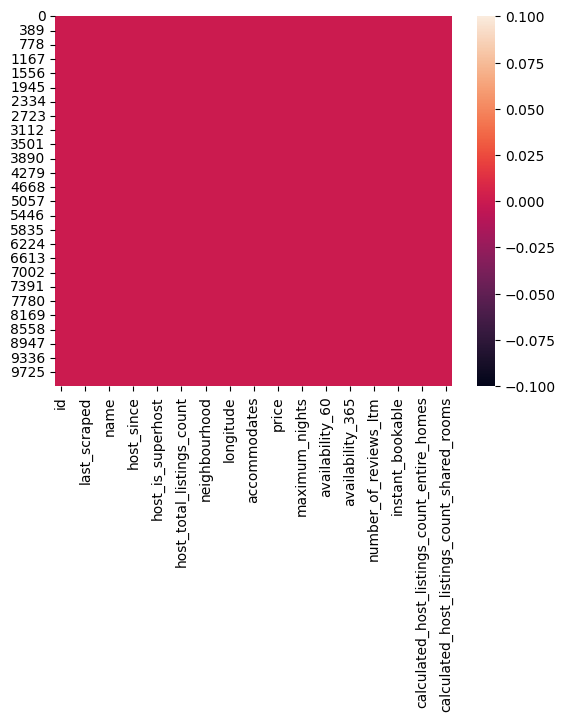

In [82]:
sns.heatmap(gz_listings.isnull())

In [84]:
gz_listings.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10099.0,NaN,NaN,NaN,727761819449215104.0,427984314100355328.0,42932.0,594041758423271168.0,900596761031286400.0,1071328676339277312.0,1189091774066713600.0
scrape_id,10099.0,NaN,NaN,NaN,20240629155744.0,0.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0
last_scraped,10099,2,2024-06-29,6992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,10099,2,city scrape,8890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,10099,9433,Leilighet på Grünerløkka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10099.0,NaN,NaN,NaN,175581736.859194,179729144.090502,43067.0,33739409.0,93032042.0,274316669.5,586067173.0
host_since,10099,3491,2019-01-02,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,10099.0,NaN,NaN,NaN,68.169007,31.471306,0.0,50.0,75.0,98.0,100.0
host_is_superhost,10099,2,f,8373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,10099.0,NaN,NaN,NaN,2.864046,10.04627,1.0,1.0,1.0,2.0,131.0


In [86]:
gz_listings.sample(5)

,id,scrape_id,last_scraped,source,name,host_id,host_since,host_acceptance_rate,host_is_superhost,host_listings_count,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
4795,8.861558e+17,2.024063e+13,2024-06-30,city scrape,Ny stor leilighet i sentrum,11233852.0,2014-01-12,46.0,t,1.0,...,18.0,25.0,11.0,10.0,0.0,f,1.0,1.0,0.0,0.0
4720,8.812204e+17,2.024063e+13,2024-06-29,city scrape,New & cozy apt. Close to the beach & city center.,61751538.0,2016-03-06,89.0,t,1.0,...,28.0,118.0,30.0,18.0,0.0,f,1.0,1.0,0.0,0.0
3318,6.815886e+17,2.024063e+13,2024-06-29,city scrape,Sjarmerende rom med kort vei til Oslo sentrum,60338273.0,2016-02-25,32.0,f,2.0,...,47.0,137.0,7.0,7.0,0.0,f,2.0,1.0,1.0,0.0
2152,5.208218e+07,2.024063e+13,2024-06-29,city scrape,Small apartment close to Barcode and Oslo sent...,68200820.0,2016-04-21,100.0,f,3.0,...,14.0,14.0,6.0,2.0,0.0,f,1.0,1.0,0.0,0.0
6617,9.781538e+17,2.024063e+13,2024-06-30,previous scrape,Wonderful apartment in the city,73584865.0,2016-05-23,100.0,f,1.0,...,2.0,2.0,7.0,7.0,0.0,t,1.0,1.0,0.0,0.0


In [92]:
gz_listings.select_dtypes(include=['number']).corr()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,1.000000,NaN,0.281282,-0.058158,-0.074703,-0.077761,0.003334,0.059489,-0.015824,-0.023935,...,0.044165,0.034965,-0.007659,-0.352045,-0.124707,0.013890,-0.081462,-0.080935,-0.011893,0.022436
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.281282,NaN,1.000000,0.022580,0.041156,0.027110,-0.016471,0.021902,-0.079604,-0.098119,...,0.044776,0.053055,0.062536,-0.087602,0.014765,0.040600,0.039039,0.024067,0.093584,0.032355
host_acceptance_rate,-0.058158,NaN,0.022580,1.000000,0.143323,0.141494,-0.047419,-0.020807,0.010057,-0.019246,...,-0.166137,-0.176424,-0.160558,0.212410,0.299318,0.273109,0.133000,0.118835,0.092073,0.040503
host_listings_count,-0.074703,NaN,0.041156,0.143323,1.000000,0.978567,-0.018606,-0.025432,-0.052880,-0.071453,...,-0.038683,-0.014136,0.107610,0.127769,0.140341,0.064313,0.923560,0.911527,0.118739,0.052219
host_total_listings_count,-0.077761,NaN,0.027110,0.141494,0.978567,1.000000,-0.019469,-0.025921,-0.038323,-0.057693,...,-0.027580,-0.005275,0.100512,0.134092,0.140287,0.068138,0.859389,0.843398,0.139475,0.058160
latitude,0.003334,NaN,-0.016471,-0.047419,-0.018606,-0.019469,1.000000,-0.221724,-0.038835,-0.020200,...,0.017545,0.002122,-0.017312,-0.043701,-0.042318,-0.050138,-0.021442,-0.010934,-0.065727,-0.019968
longitude,0.059489,NaN,0.021902,-0.020807,-0.025432,-0.025921,-0.221724,1.000000,0.000798,0.001975,...,-0.050760,-0.049781,-0.054396,-0.057327,-0.041703,-0.042161,-0.024490,-0.033575,0.060423,-0.013371
accommodates,-0.015824,NaN,-0.079604,0.010057,-0.052880,-0.038323,-0.038835,0.000798,1.000000,0.794514,...,0.004206,-0.014226,0.014858,-0.056295,-0.051854,-0.074844,-0.078744,-0.055092,-0.146830,-0.059107
bedrooms,-0.023935,NaN,-0.098119,-0.019246,-0.071453,-0.057693,-0.020200,0.001975,0.794514,1.000000,...,-0.015576,-0.044111,-0.024155,-0.098263,-0.122941,-0.137591,-0.089219,-0.074148,-0.095162,-0.039850


## EDA